<h1>Contrastive Learning</h1>
This example demonstrates how to implement a Contrastive Learning Siamese Network using Contrastive Loss to determine whether a pair of images are similar. Contrastive Loss was introduced by Yann Le Cunn et al. in the paper "Dimensionality Reduction by Learning an Invariant Mapping.".

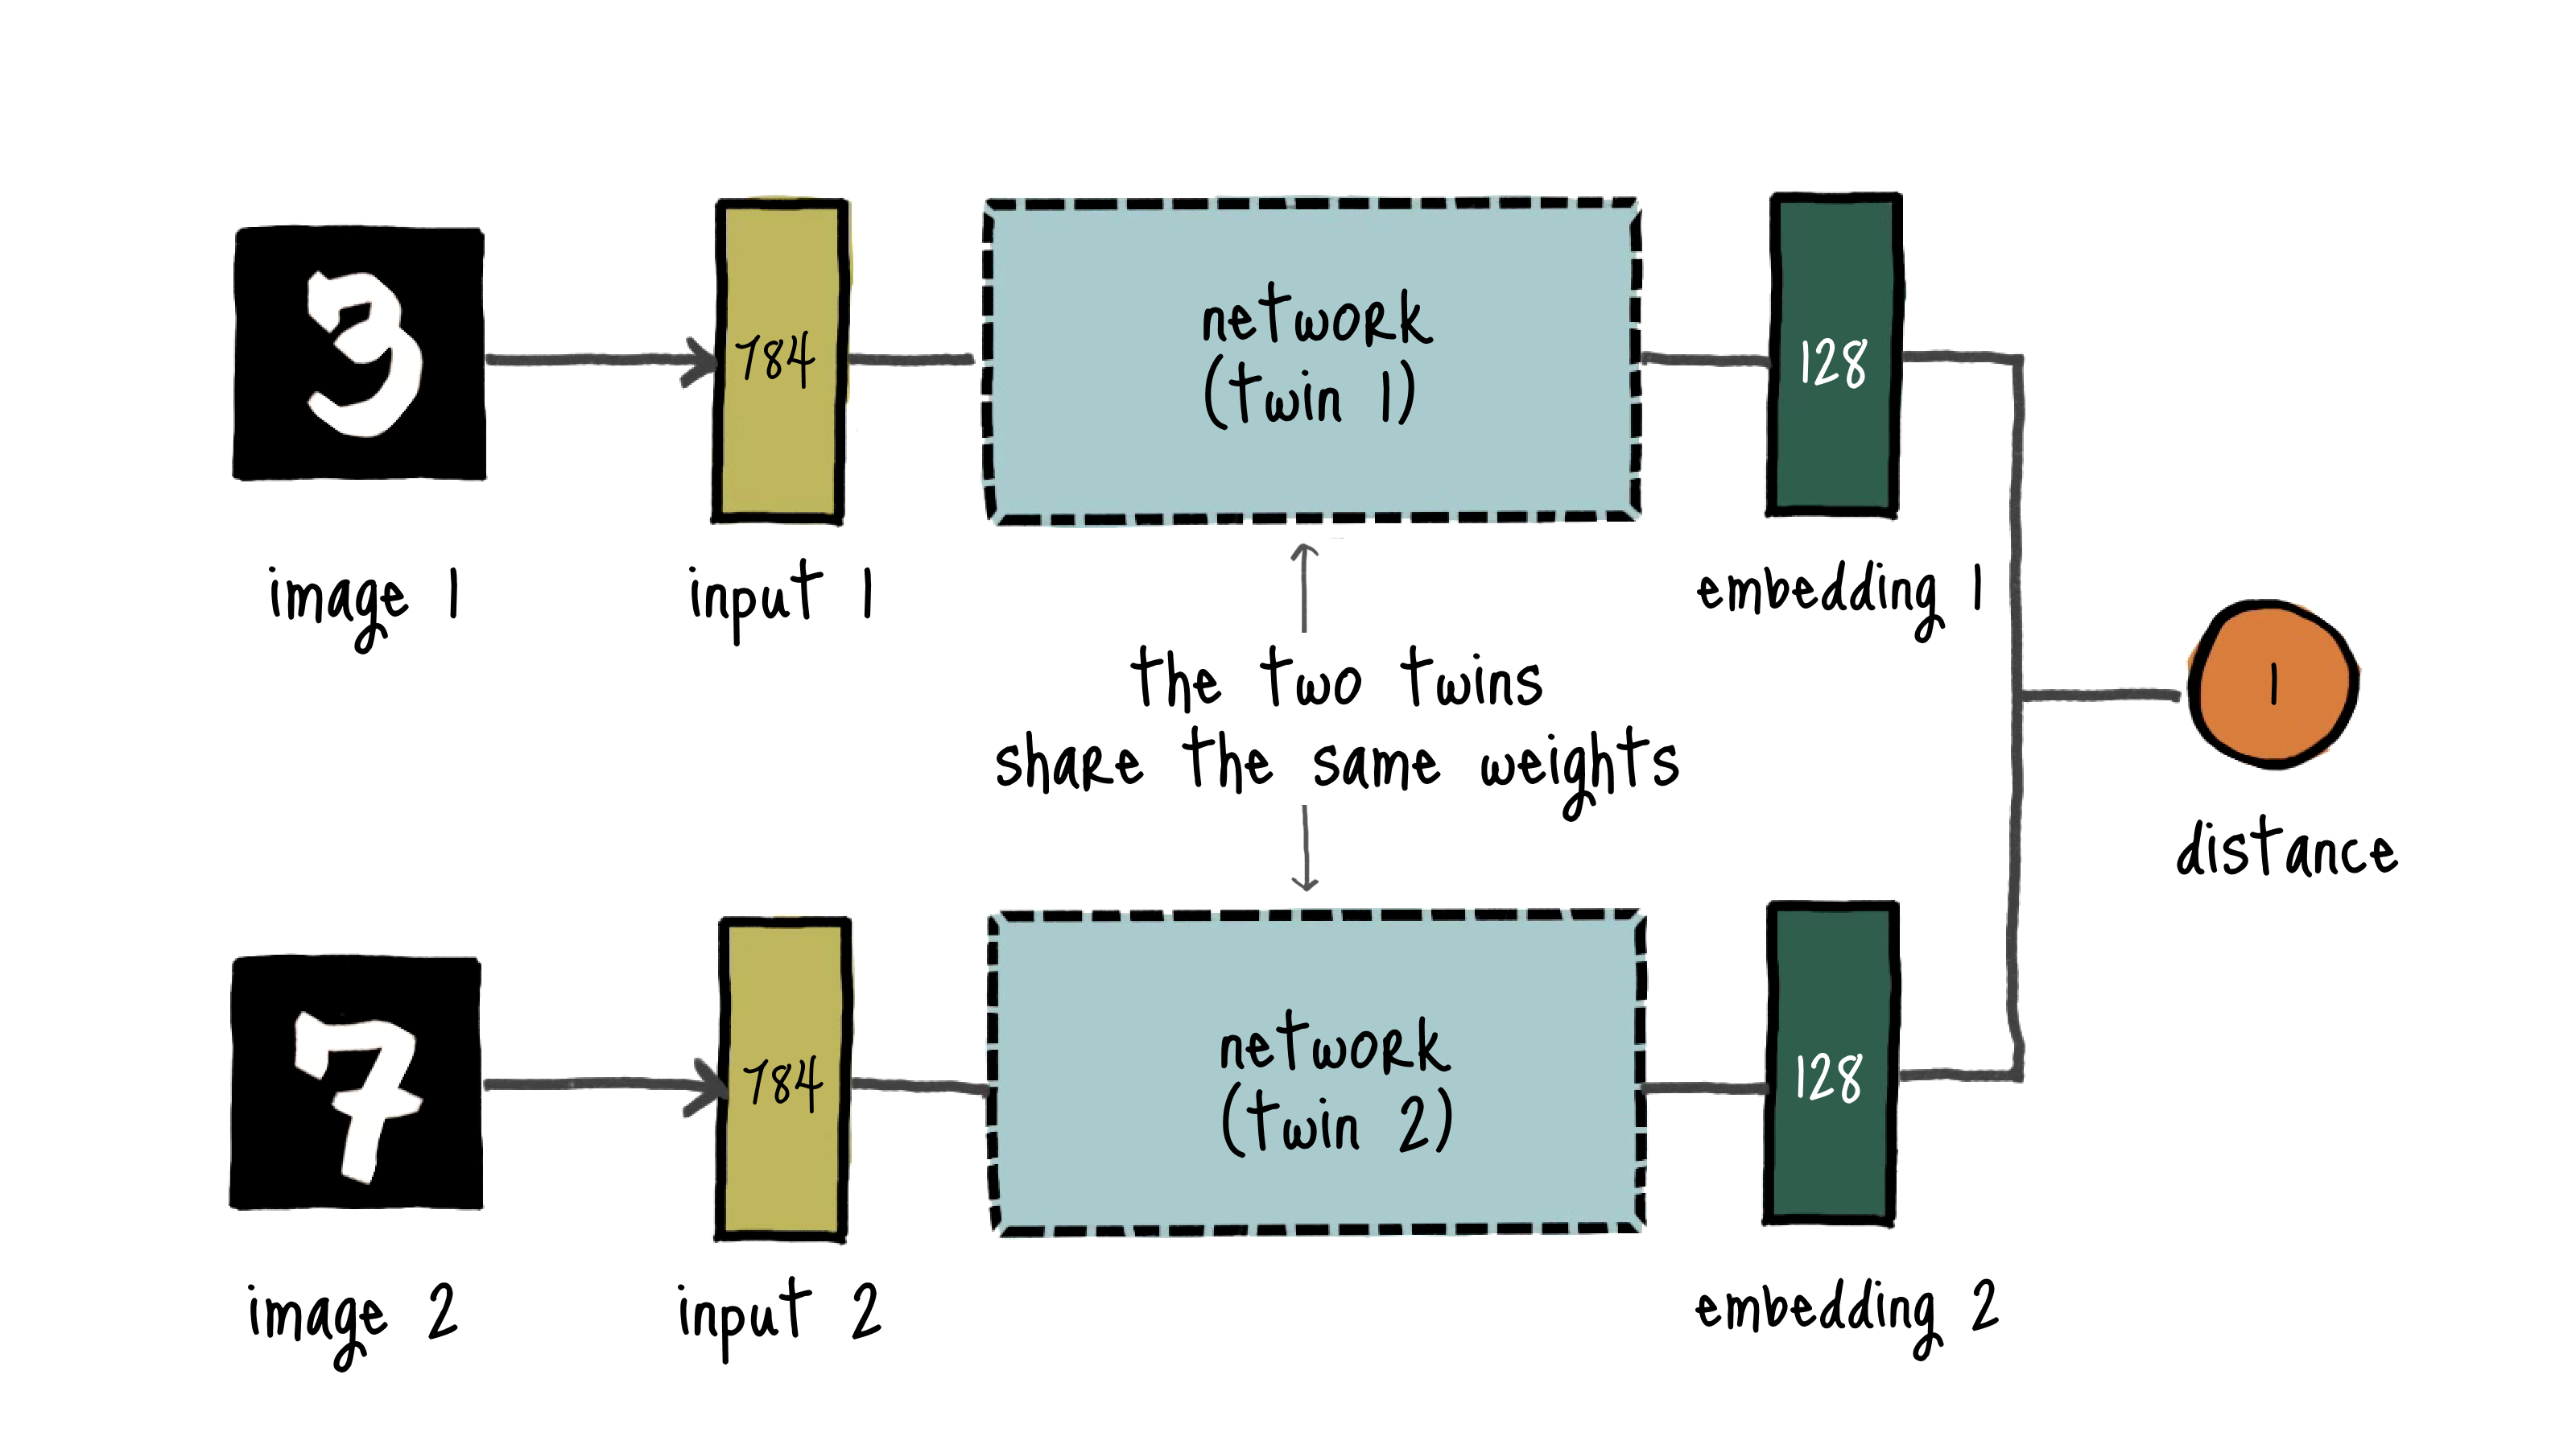

In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
dataset= tf.data.Dataset.range(10)


for val in dataset:
    print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [ ]:
dataset=tf.data.Dataset.range(10)


dataset=dataset.window(size=5,shift=1)

for window_dataset in dataset:
    print(window_dataset)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [ ]:
dataset=tf.data.Dataset.range(10)

dataset =dataset.window(size=5,shift=1)

for window_dataset in dataset:
    print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


In [ ]:
dataset=tf.data.Dataset.range(10)

dataset=dataset.window(size=5,shift=1,drop_remainder=True)

for window_dataset in dataset:
    print([item.numpy() for item in window_dataset])


[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [ ]:
dataset=tf.data.Dataset.range(10)


dataset=dataset.window(size=5,shift=1,drop_remainder=True)

dataset=dataset.flat_map(lambda window: window.batch(5))


for window in dataset:
    print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [ ]:
dataset=tf.data.Dataset.range(10)

dataset = dataset.window(size=5,shift=1,drop_remainder=True)

dataset= dataset.flat_map(lambda window: window.batch(5))

dataset=dataset.map(lambda window: (window[:-1], window[-1]))

for x,y in dataset:
    print("x= " , x.numpy())
    print("y = ", y.numpy())
    print()

x=  [0 1 2 3]
y =  4

x=  [1 2 3 4]
y =  5

x=  [2 3 4 5]
y =  6

x=  [3 4 5 6]
y =  7

x=  [4 5 6 7]
y =  8

x=  [5 6 7 8]
y =  9



In [ ]:
dataset= tf.data.Dataset.range(10)

dataset= dataset.window(size=5,shift=1,drop_remainder=True)


dataset=dataset.flat_map(lambda window: window.batch(5))

dataset= dataset.map(lambda window: (window[:-1], window[-1]))


dataset=dataset.shuffle(buffer_size=10)

for x,y in dataset:
    print("x=", x.numpy())
    print("y=", y.numpy())
    print()

x= [0 1 2 3]
y= 4

x= [4 5 6 7]
y= 8

x= [1 2 3 4]
y= 5

x= [3 4 5 6]
y= 7

x= [2 3 4 5]
y= 6

x= [5 6 7 8]
y= 9



In [ ]:
dataset= tf.data.Dataset.range(10)

dataset= dataset.window(size=5, shift=1, drop_remainder=True)

dataset= dataset.flat_map(lambda window: window.batch(5))

dataset=dataset.map(lambda window: (window[:-1], window[-1]) )

dataset=dataset.shuffle(buffer_size=10)


dataset=dataset.batch(2).prefetch(1)

for x,y in dataset:
    print("x=", x.numpy())
    print("y=", y.numpy())
    print()


x= [[4 5 6 7]
 [2 3 4 5]]
y= [8 6]

x= [[0 1 2 3]
 [1 2 3 4]]
y= [4 5]

x= [[3 4 5 6]
 [5 6 7 8]]
y= [7 9]



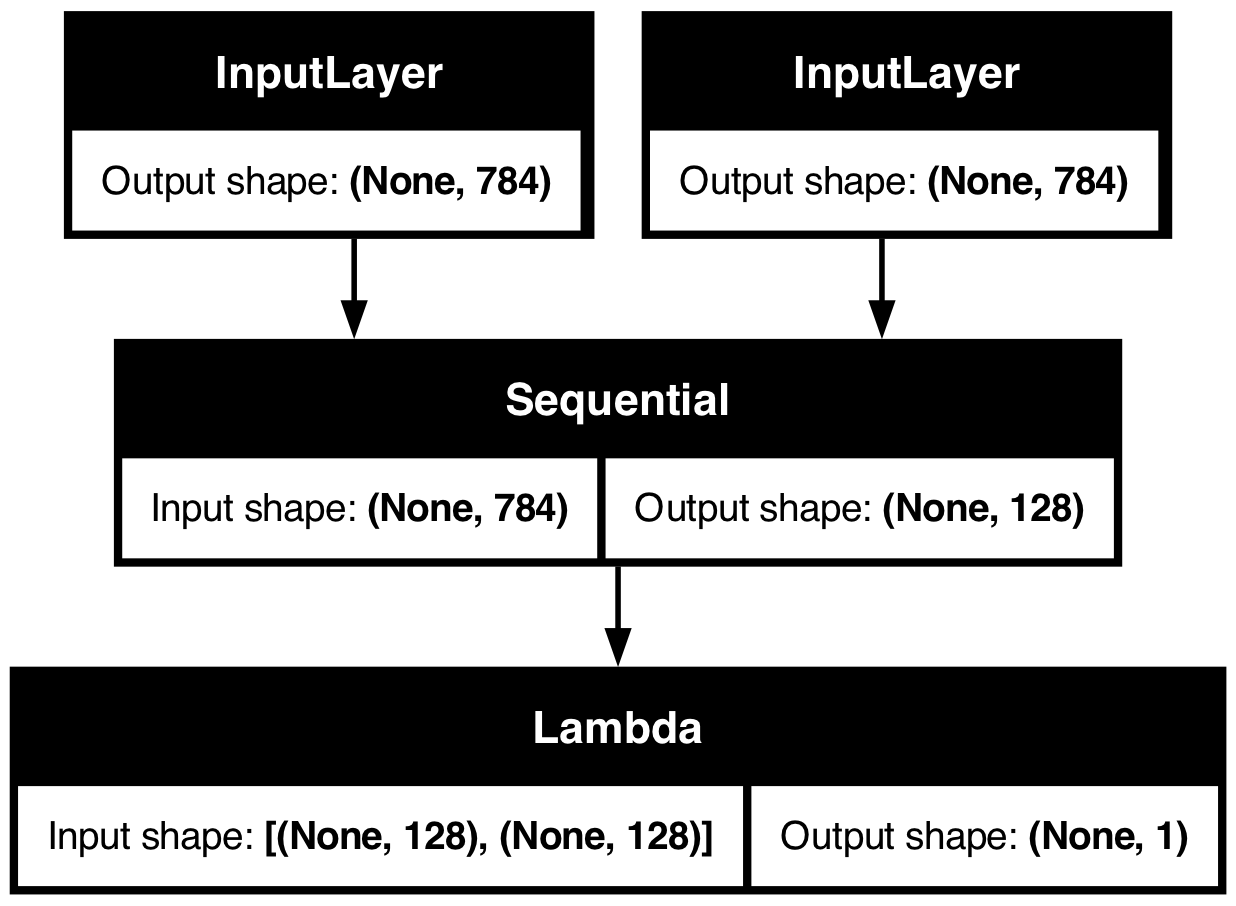